In [3]:
import numpy as np
from load_data_df import *
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Data Paths

In [4]:
aes_data_dir = '../aes'
uart_data_dir = '../uart'
or1200_data_dir = '../or1200'
picorv32_data_dir = '../picorv32'

# Plot Settings

In [5]:
# Plot Settings
FIG_WIDTH            = 9
FIG_HEIGHT           = 4
LINE_WIDTH           = 2
AES_SAVE_AS_PDF      = True
UART_SAVE_AS_PDF     = True
OR1200_SAVE_AS_PDF   = True
PICORV32_SAVE_AS_PDF = True

# Plot PDF Filenames
AES_PDF_FILENAME      = 'aes-fps-vs-time.pdf'
UART_PDF_FILENAME     = 'uart-fps-vs-time.pdf'
OR1200_PDF_FILENAME   = 'or1200-fps-vs-time.pdf'
PICORV32_PDF_FILENAME = 'picorv32-fps-vs-time.pdf'

# Plot Function

In [8]:
def plot_ttt_timeseries(clk_period, epochs, ylim, df):
    # Create Figure
    sns.set()
    fig, ax = plt.subplots(1, 1, figsize=(9, 3))

    # Plot Data
    sns.lineplot(x="Time", y="Total Malicious Coalesced TTTs",   data=df, ax=ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Total Malicious Distributed TTTs", data=df, ax=ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Coalesced Constants",              data=df, ax=ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Distributed Constants",            data=df, ax=ax, linewidth=LINE_WIDTH)

    # Format Main Plot
    ax.set_ylim(-10, ylim)
    ax.set_xlabel('Clock Cycles')
    ax.set_ylabel('# SSCs')
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)

    # Add background shading to indicate different testing phases
    shade = True
    cycle_epochs = list(map(lambda x: float(x) / float(clk_period), epochs))
    for i in range(1, len(cycle_epochs[0:-1])):
        x_coord      = cycle_epochs[i]
        next_x_coord = cycle_epochs[i+1]
        if shade:
            ax.fill_between([x_coord, next_x_coord], -10, ylim, facecolor='#bac0c2', alpha=0.5)
        shade = not shade
    
    return ax

# Plot AES False Positives

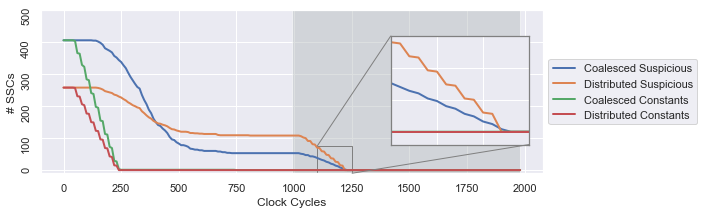

In [9]:
# Define Design Characteristics
aes_clk_period = 10
aes_epochs     = [0, 9900, 19800]
aes_ylim       = 500

# Load Data
aes_df = load_data_df_wf(aes_data_dir, aes_clk_period, 'aes')

# Create Main Plot
ax = plot_ttt_timeseries(aes_clk_period, \
                         aes_epochs, \
                         aes_ylim, \
                         aes_df)
    
# Create 2.5x Zoom-in Inset
axins = zoomed_inset_axes(ax, 4, loc=1, bbox_to_anchor=(575, 170))
sns.lineplot(x="Time", y="Total Malicious Coalesced TTTs",   data=aes_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Distributed TTTs", data=aes_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Coalesced Constants",              data=aes_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Distributed Constants",            data=aes_df, ax=axins, linewidth=LINE_WIDTH)

# Format Inset
x1, x2, y1, y2 = float(11000) / float(aes_clk_period), float(12500) / float(aes_clk_period), -10, 75
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_frame_on(True)
axins.set_xlabel('')
axins.set_ylabel('')
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.setp(axins.spines.values(), color='0.5')
plt.setp([axins.get_xticklines(), axins.get_yticklines()], color='0.5')

# Create Legend
legend_labels = ['Coalesced Suspicious','Distributed Suspicious','Coalesced Constants','Distributed Constants']
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Save as PDF
if AES_SAVE_AS_PDF:
    plt.savefig(AES_PDF_FILENAME, format='pdf', bbox_inches='tight', transparent=False)

# Plot UART False Positives

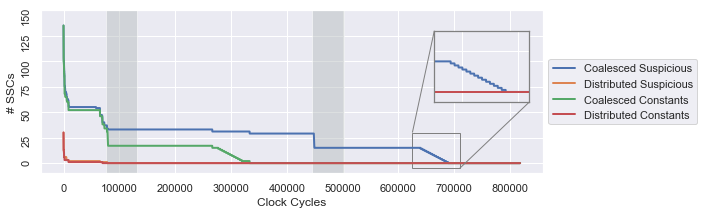

In [10]:
# Define Design Characteristics
uart_clk_period = 10
uart_epochs     = [0, 786150, 1349660, 4482460, 5046260, 8179060]
uart_epochs     = map(lambda x: x - 30000, uart_epochs)
uart_ylim       = 150

# Load Data
uart_df = load_data_df_wf(uart_data_dir, uart_clk_period, 'uart')
    
# Create Main Plot
ax = plot_ttt_timeseries(uart_clk_period, \
                         uart_epochs, \
                         uart_ylim, \
                         uart_df)

# Create 2x zoom-in inset
axins = zoomed_inset_axes(ax, 2, loc=1, bbox_to_anchor=(575, 175))
sns.lineplot(x="Time", y="Total Malicious Coalesced TTTs",   data=uart_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Distributed TTTs", data=uart_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Coalesced Constants",              data=uart_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Distributed Constants",            data=uart_df, ax=axins, linewidth=LINE_WIDTH)

# Format Inset Plot
x1, x2, y1, y2 = float(6250000) / float(uart_clk_period) , float(7100000) / float(uart_clk_period), -5, 30
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_frame_on(True)
axins.set_xlabel('')
axins.set_ylabel('')
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=4, loc2=2, fc="none", ec="0.5")
plt.setp(axins.spines.values(), color='0.5')
plt.setp([axins.get_xticklines(), axins.get_yticklines()], color='0.5')

# Create Legend
legend_labels = ['Coalesced Suspicious','Distributed Suspicious','Coalesced Constants','Distributed Constants']
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Save as PDF
if UART_SAVE_AS_PDF:
    plt.savefig(UART_PDF_FILENAME, format='pdf', bbox_inches='tight', transparent=False)

# Plot OR1200 False Positives

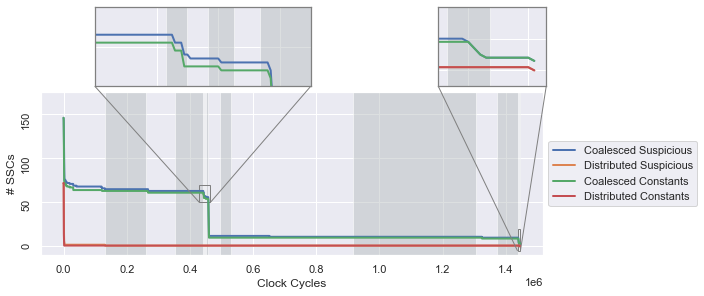

In [12]:
# Define Design Characteristics
or1200_clk_period   = 20
or1200_epochs       = or1200_epochs = [0,2620900,5241700,7035700,8829700,8898100,8966500,9051700,9136900,9882700,10628500,18361300, 26094100,27429100,28764100,28836100,28908100]
or1200_ylim         = 175
or1200_cycle_epochs = list(map(lambda x: float(x) / float(or1200_clk_period), or1200_epochs))

# Load Data
or1200_df = load_data_df_wf(or1200_data_dir, or1200_clk_period, 'or1200')
    
# Create Main Plot
ax = plot_ttt_timeseries(or1200_clk_period, \
                         or1200_epochs, \
                         or1200_ylim, \
                         or1200_df)

# ============================================================================================================
# Create Zoom-in Inset 1
axins = inset_axes(ax, 3, 1.1, loc=2, bbox_to_anchor=(0.2, 1.3), bbox_transform=ax.figure.transFigure) # stretch, no zoom
sns.lineplot(x="Time", y="Total Malicious Coalesced TTTs",   data=or1200_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Distributed TTTs", data=or1200_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Coalesced Constants",              data=or1200_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Distributed Constants",            data=or1200_df, ax=axins, linewidth=LINE_WIDTH)

# Add Line Separators
shade = True
for i in range(0, len(or1200_cycle_epochs[0:-1])):
    x_coord      = or1200_cycle_epochs[i]
    next_x_coord = or1200_cycle_epochs[i+1]
    if shade:
        axins.fill_between([x_coord, next_x_coord], -10, or1200_ylim, facecolor='#bac0c2', alpha=0.5)
    shade = not shade
    
# Format Inset
x1, x2, y1, y2 = float(8600000) / float(or1200_clk_period), float(9300000) / float(or1200_clk_period), 50, 70
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_frame_on(True)
axins.set_xlabel('')
axins.set_ylabel('') 
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
plt.setp(axins.spines.values(), color='0.5')
plt.setp([axins.get_xticklines(), axins.get_yticklines()], color='0.5')

# ============================================================================================================
# Create Zoom-in Inset 2
axins2 = inset_axes(ax, 1.5, 1.1, loc=2, bbox_to_anchor=(0.73, 1.3), bbox_transform=ax.figure.transFigure) # stretch, no zoom
sns.lineplot(x="Time", y="Total Malicious Coalesced TTTs",   data=or1200_df, ax=axins2, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Distributed TTTs", data=or1200_df, ax=axins2, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Coalesced Constants",              data=or1200_df, ax=axins2, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Distributed Constants",            data=or1200_df, ax=axins2, linewidth=LINE_WIDTH)

# Add Line Separators
shade = True
for i in range(0, len(or1200_cycle_epochs[0:-1])):
    x_coord      = or1200_cycle_epochs[i]
    next_x_coord = or1200_cycle_epochs[i+1]
    if shade:
        axins2.fill_between([x_coord, next_x_coord], -10, or1200_ylim, facecolor='#bac0c2', alpha=0.5)
    shade = not shade
    
# Format Inset
x1, x2, y1, y2 = float(28750000) / float(or1200_clk_period), float(28930000) / float(or1200_clk_period), -5, 20
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
axins2.set_frame_on(True)
axins2.set_xlabel('')
axins2.set_ylabel('') 
axins2.xaxis.set_ticklabels([])
axins2.yaxis.set_ticklabels([])

mark_inset(ax, axins2, loc1=3, loc2=4, fc="none", ec="0.5")
plt.setp(axins2.spines.values(), color='0.5')
plt.setp([axins2.get_xticklines(), axins2.get_yticklines()], color='0.5')

# ============================================================================================================
# Create Legend
legend_labels = ['Coalesced Suspicious','Distributed Suspicious','Coalesced Constants','Distributed Constants']
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Save as PDF
if OR1200_SAVE_AS_PDF:
    plt.savefig(OR1200_PDF_FILENAME, format='pdf', bbox_inches='tight', transparent=False)

# Plot PICORV32 False Positives

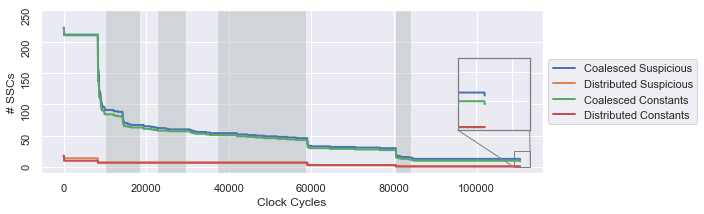

In [13]:
# Define Design Characteristics
picorv32_clk_period    = 10000
picorv32_epochs        = [0, 10039, 18389, 22506, 29582, 37120, 58762, 80204, 84214, 110391]
picorv32_epochs_scaled = map(lambda x: x * picorv32_clk_period, picorv32_epochs)
picorv32_ylim          = 250
picorv32_cycle_epochs  = map(lambda x: float(x) / float(picorv32_clk_period), picorv32_epochs)

# Load Data
picorv32_df = load_data_df_wf(picorv32_data_dir, picorv32_clk_period, 'picorv32')
    
# Create Main Plot
ax = plot_ttt_timeseries(picorv32_clk_period, \
                         picorv32_epochs_scaled, \
                         picorv32_ylim, \
                         picorv32_df)

# ============================================================================================================
# Create Zoom-in Inset 1
axins = inset_axes(ax, 1, 1, loc=3, bbox_to_anchor=(0.76, 0.3), bbox_transform=ax.figure.transFigure) # stretch, no zoom
sns.lineplot(x="Time", y="Total Malicious Coalesced TTTs",   data=picorv32_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Distributed TTTs", data=picorv32_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Coalesced Constants",              data=picorv32_df, ax=axins, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Distributed Constants",            data=picorv32_df, ax=axins, linewidth=LINE_WIDTH)

# Add Line Separators
shade = False
for i in range(0, len(picorv32_epochs[0:-1])):
    x_coord      = picorv32_epochs[i]
    next_x_coord = picorv32_epochs[i+1]
    if shade:
        axins.fill_between([x_coord, next_x_coord], -10, picorv32_ylim, facecolor='#bac0c2', alpha=0.5)
    shade = not shade
    
# Format Inset
x1, x2, y1, y2 = 109000, 113000, 0, 25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_frame_on(True)
axins.set_xlabel('')
axins.set_ylabel('') 
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
plt.setp(axins.spines.values(), color='0.5')
plt.setp([axins.get_xticklines(), axins.get_yticklines()], color='0.5')

# ============================================================================================================
# Create Legend
legend_labels = ['Coalesced Suspicious','Distributed Suspicious','Coalesced Constants','Distributed Constants']
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Save as PDF
if PICORV32_SAVE_AS_PDF:
    plt.savefig(PICORV32_PDF_FILENAME, format='pdf', bbox_inches='tight', transparent=False)